<a href="https://colab.research.google.com/github/jysonganan/methylDeConv/blob/master/MethylCIBERSORT_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/dat.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat.shape

(801, 55)

In [ ]:
dat.tail()

,Unnamed: 0,Gran_105,Gran_218,Gran_261,CD4+_105,CD4+_218,CD4+_261,CD8+_105,CD8+_218,CD8+_261,CD19+_105,CD19+_218,CD19+_261,CD14+_105,CD14+_218,CD14+_261,CD56+_105,CD56+_218,CD56+_261,Gran_043,Gran_160,Gran_149,CD4+_043,CD4+_160,CD4+_149,CD8+_043,CD8+_160,CD8+_149,CD19+_043,CD19+_160,CD19+_149,CD14+_043,CD14+_160,CD14+_149,CD56+_043,CD56+_160,CD56+_149,GSM999336_hg19_wgEncodeHaibMethyl450HipeSitesRep1,GSM999346_hg19_wgEncodeHaibMethyl450SaecSitesRep1,GSM999361_hg19_wgEncodeHaibMethyl450HreSitesRep1,GSM999355_hg19_wgEncodeHaibMethyl450HaeSitesRep1,GSM999362_hg19_wgEncodeHaibMethyl450HrpeSitesRep1,GSM999369_hg19_wgEncodeHaibMethyl450PrecSitesRep1,GSM999378_hg19_wgEncodeHaibMethyl450HeeSitesRep1,GSM999380_hg19_wgEncodeHaibMethyl450HcpeSitesRep1,GSM999384_hg19_wgEncodeHaibMethyl450HnpceSitesRep1,GSM999385_hg19_wgEncodeHaibMethyl450HmecSitesRep1,GSM999390_hg19_wgEncodeHaibMethyl450HrceSitesRep1,GSM999340_hg19_wgEncodeHaibMethyl450Imr90SitesRep1,GSM999342_hg19_wgEncodeHaibMethyl450ProgfibSitesRep1,GSM999344_hg19_wgEncodeHaibMethyl450Ag04449SitesRep1,GSM999345_hg19_wgEncodeHaibMethyl450Ag04450SitesRep1,GSM999348_hg19_wgEncodeHaibMethyl450Ag09319SitesRep1,GSM999350_hg19_wgEncodeHaibMethyl450BjSitesRep1,GSM999394_hg19_wgEncodeHaibMethyl450NhdfneoSitesRep1
796,cg01979157,0.0733535152867646,0.0668619720301564,0.0736173892621154,0.025127895421492,0.0250641495937271,0.0149622229380367,0.0549648992569807,0.0775279833470068,0.145782365383203,0.0913222859923189,0.124687324279836,0.0591745349878142,0.0639444173845056,0.0656131508022841,0.0617293380143397,0.154383888468476,0.18113357686431,0.171409883052042,0.0970685950425268,0.109820247145003,0.0809965819433513,0.0214757382319614,0.0200374913220727,0.0212337339925177,0.103819773929307,0.123560745000217,0.11173407442225,0.161369284362082,0.144647364583504,0.103578756973407,0.112864678949998,0.0812294023586664,0.0680869269583461,0.211108860427708,0.229212890781565,0.162897610052986,0.0173322906358214,0.0164928649417189,0.0169414340064748,0.0164842824848434,0.0184671768442663,0.0187976714807177,0.0181359087799963,0.0210295194294747,0.0208654062182049,0.0156328011113936,0.0178715202643211,0.023873889254837,0.0174366406226652,0.0175512739389135,0.0158323291557075,0.0179024557272957,0.02308985456055,0.0155211799257968
797,cg08462306,0.0218242061166133,0.0199895799354737,0.0212388438806031,0.0197726305404107,0.0205470492095734,0.0145685685764272,0.0311272236832152,0.0290266799827141,0.0252661764498836,0.0202292234928587,0.0219881055440476,0.0271905992113368,0.021917351369624,0.022598031071468,0.0223339929367571,0.122189139962738,0.131892517220171,0.0956066488518176,0.0206299365066183,0.0198347899822432,0.0197581552502362,0.0187626446949241,0.019704974268291,0.0200445650844625,0.0237575325742156,0.0242250222034382,0.0484081471769621,0.0245311745374925,0.0232846829075241,0.0217834167252164,0.021190309969234,0.0229517771987365,0.0194587523366489,0.207946077174549,0.146138817737407,0.189977928254035,0.0197744858284877,0.0204308155047839,0.0191797606264768,0.0217690570151862,0.0202656888869184,0.0195958556636927,0.0216601142145503,0.0172483874587297,0.0175101920581548,0.0208623228039401,0.0163288381701322,0.0182490316770045,0.0239850842447473,0.0204225297258327,0.0202187030956685,0.0224838817549156,0.0203469750571286,0.0230349966144954
798,cg12926720,0.0930569014699074,0.0821787061947088,0.0900624406584275,0.179662769894388,0.101967464399526,0.101812094604411,0.21500523290817,0.182698207112529,0.157205659855369,0.112784763856338,0.112855521864113,0.115819385721426,0.0943294577863564,0.0783657877336784,0.0822652023440587,0.226880480289796,0.271962874320351,0.254368591006927,0.100211951479292,0.0725465771591339,0.111235277555697,0.145555831939567,0.121076288463955,0.118100908357808,0.184222016415342,0.156056063700557,0.202669126786902,0.135692739320303,0.105286723258771,0.100559673908082,0.0755167394062026,0.0865237897851186,0.103682124430619,0.238800072029519,0.197950057852114,0.203388458446814,0.0526739229

In [ ]:
dat.head()

,Unnamed: 0,Gran_105,Gran_218,Gran_261,CD4+_105,CD4+_218,CD4+_261,CD8+_105,CD8+_218,CD8+_261,CD19+_105,CD19+_218,CD19+_261,CD14+_105,CD14+_218,CD14+_261,CD56+_105,CD56+_218,CD56+_261,Gran_043,Gran_160,Gran_149,CD4+_043,CD4+_160,CD4+_149,CD8+_043,CD8+_160,CD8+_149,CD19+_043,CD19+_160,CD19+_149,CD14+_043,CD14+_160,CD14+_149,CD56+_043,CD56+_160,CD56+_149,GSM999336_hg19_wgEncodeHaibMethyl450HipeSitesRep1,GSM999346_hg19_wgEncodeHaibMethyl450SaecSitesRep1,GSM999361_hg19_wgEncodeHaibMethyl450HreSitesRep1,GSM999355_hg19_wgEncodeHaibMethyl450HaeSitesRep1,GSM999362_hg19_wgEncodeHaibMethyl450HrpeSitesRep1,GSM999369_hg19_wgEncodeHaibMethyl450PrecSitesRep1,GSM999378_hg19_wgEncodeHaibMethyl450HeeSitesRep1,GSM999380_hg19_wgEncodeHaibMethyl450HcpeSitesRep1,GSM999384_hg19_wgEncodeHaibMethyl450HnpceSitesRep1,GSM999385_hg19_wgEncodeHaibMethyl450HmecSitesRep1,GSM999390_hg19_wgEncodeHaibMethyl450HrceSitesRep1,GSM999340_hg19_wgEncodeHaibMethyl450Imr90SitesRep1,GSM999342_hg19_wgEncodeHaibMethyl450ProgfibSitesRep1,GSM999344_hg19_wgEncodeHaibMethyl450Ag04449SitesRep1,GSM999345_hg19_wgEncodeHaibMethyl450Ag04450SitesRep1,GSM999348_hg19_wgEncodeHaibMethyl450Ag09319SitesRep1,GSM999350_hg19_wgEncodeHaibMethyl450BjSitesRep1,GSM999394_hg19_wgEncodeHaibMethyl450NhdfneoSitesRep1
0,cg07721872,0.968390425571057,0.965528350836877,0.962389577288571,0.957821953132809,0.948877168956881,0.972687556803376,0.946588114393148,0.964255236044151,0.953593072931763,0.0632097444728146,0.038591292839014,0.158367011461243,0.947806508874997,0.95751639128285,0.964356001371246,0.96828819863026,0.955933166596403,0.961810475631993,0.952337866786326,0.968254673087829,0.968756815042014,0.960077199448402,0.952033812131928,0.969657741497574,0.96242583153003,0.967066580613477,0.967627338334112,0.0405073850066685,0.0622335212981803,0.0863217186113569,0.95931408018053,0.964833219038002,0.963859600403542,0.943221151099348,0.950883280100567,0.973943177335935,0.977196917352267,0.940677681843359,0.981480153859454,0.972483112448059,0.971960306111902,0.974548764549596,0.956253879380186,0.964520811855945,0.975412450660438,0.980287565251441,0.976248155138073,0.979457862939973,0.979367606590456,0.975722442289934,0.978142618698641,0.980509613884384,0.957982765155681,0.970669870399145
1,cg02665297,0.968209884323206,0.965134050202537,0.964146121672159,0.963738506031178,0.962533095499668,0.969817911932618,0.955105374249523,0.961279126843573,0.961058867354715,0.0482896024164661,0.0373271457723157,0.0826112585226908,0.957937509416215,0.969245763227219,0.962501017932828,0.966133960957574,0.966391073302813,0.95961306614304,0.967882109214574,0.961558759222597,0.959998325453943,0.969429624340122,0.970698364913921,0.964431446992758,0.965136912576836,0.962625393278183,0.963706842682362,0.0414768034698856,0.075589099899644,0.0593012888152063,0.961440692015832,0.966440186554954,0.964191734671386,0.951809194834033,0.952274867237031,0.971178596677562,0.958897430289923,0.3425780003016,0.949046686298871,0.950357613159779,0.965296531190179,0.785090230659497,0.826843141263349,0.964012144047217,0.952925870481292,0.956782955336941,0.95940468570097,0.971021801435797,0.965775384586353,0.935329727294021,0.951232517015567,0.943035412652533,0.903393055011557,0.960453579373694
2,cg13738327,0.980948907601396,0.979412142384655,0.979245163025155,0.9784561661439,0.976135605015103,0.986188299286368,0.878948694666555,0.947501962777499,0.925021902394991,0.0933437710980107,0.0726408981057061,0.13293749534691,0.978852879259972,0.976789255683245,0.980088081086543,0.883095413573416,0.861094972016137,0.944506778617624,0.979141390273774,0.976678553274377,0.982554382718148,0.97122826355711,0.985857650678921,0.978761230654054,0.964539861743568,0.975400451364101,0.954817082892016,0.0734850470341363,0.0609409725089748,0.0900266814548394,0.975377112765719,0.978408449880531,0.979985343671848,0.918660043084886,0.935711749592894,0.976495844591064,0.981193778469013,0.974255586271963,0.965859936428263,0.986035133975787,0.981628782970816,0.981256534

In [ ]:
type(dat.iloc[800,:])

pandas.core.series.Series

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[800,:].array
X = dat.iloc[:-1,]

In [ ]:
type(y)

pandas.core.arrays.numpy_.PandasArray

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X = X.T

In [ ]:
X.shape

(54, 800)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})


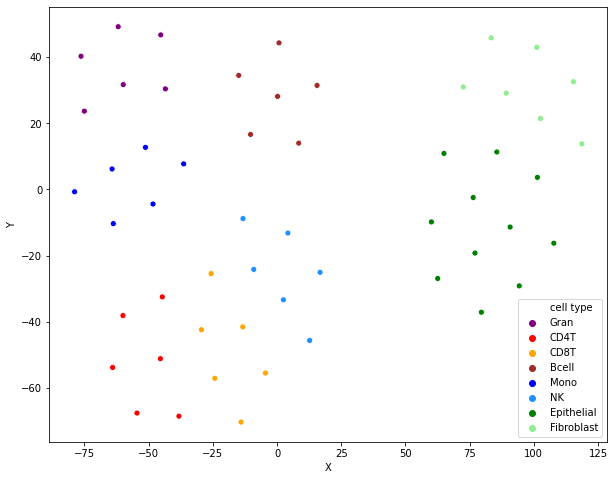

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen'],
              legend='full',
              data=tsne_df)

In [ ]:
dat = pd.read_csv("/content/drive/My Drive/dat.csv")
dat = dat.iloc[:,1:]
y = dat.iloc[800,:]
X = dat.iloc[:-1,]
X = X.T


X.index = range(54)
y.index = range(54)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey","purple"]))
row_colors = y.map(my_palette)


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

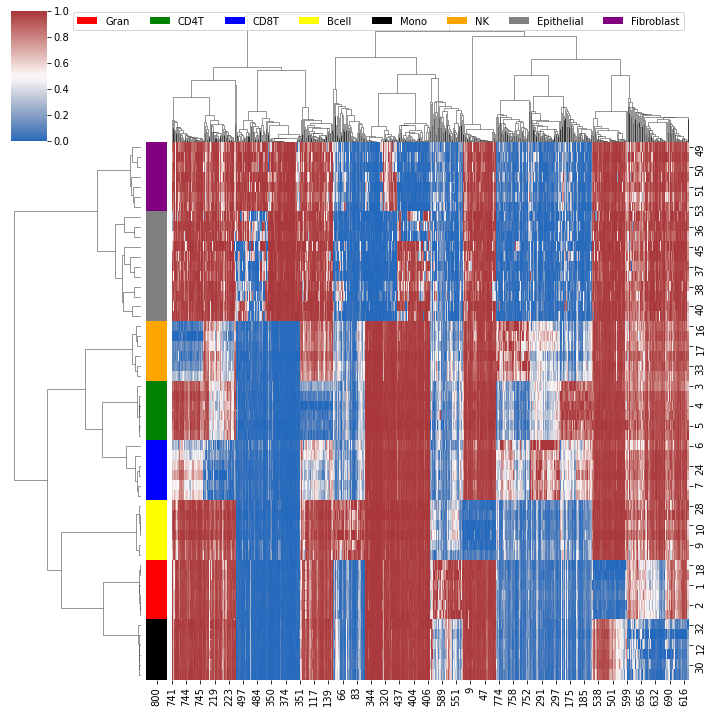

In [ ]:
plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=8)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

## check tSNE of reference profiles (FlowEPIC + cfDNA+ epithelial) with all probes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/dat.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<Figure size 720x576 with 0 Axes>

In [ ]:
dat.shape

(866092, 58)

In [ ]:
dat.head()

,Unnamed: 0,201868500150_R01C01,201868500150_R03C01,201868500150_R05C01,201868500150_R07C01,201868500150_R08C01,201868590193_R02C01,201868590193_R03C01,201868590193_R06C01,201868590206_R02C01,201868590206_R04C01,201868590206_R05C01,201868590206_R06C01,201868590206_R08C01,201868590243_R03C01,201868590243_R04C01,201868590243_R06C01,201868590243_R07C01,201868590243_R08C01,201868590267_R06C01,201868590267_R07C01,201868590267_R08C01,201869680009_R06C01,201869680009_R07C01,201869680009_R08C01,201869680030_R01C01,201869680030_R02C01,201869680030_R06C01,201870610056_R02C01,201870610056_R04C01,201870610056_R07C01,201870610056_R08C01,201870610111_R01C01,201870610111_R02C01,201870610111_R04C01,201870610111_R05C01,201870610111_R06C01,201870610111_R07C01,GSM3455823,GSM3455824,GSM3455826,GSM3455827,GSM3455828,GSM3455829,GSM3455852,GSM3455863,GSM3455864,GSM3455865,GSM3455780,GSM3455787,GSM3455815,GSM3455812,GSM3455816,GSM3455819,GSM3455807,GSM3455783,GSM3455795,GSM3455785
0,ref_phenotype,Neu,NK,Neu,Bcell,NK,NK,CD4T,Bcell,Neu,CD8T,CD8T,Mono,CD4T,CD4T,Mono,CD8T,Neu,Mono,CD8T,Mono,CD8T,Bcell,Mono,CD8T,CD4T,Bcell,CD4T,Neu,Bcell,NK,Mono,NK,Bcell,CD4T,Neu,CD4T,NK,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA,cfDNA
1,cg18478105,0.0141649355329684,0.0158870073719035,0.0144380991970617,0.0142142973381057,0.0154769363811275,0.0156536686065361,0.0165525006996802,0.0174285436770023,0.0183805667140025,0.0162617031284304,0.0186617900407879,0.0118838407099047,0.0138442809241554,0.0181886139509642,0.0173193375821743,0.0152889635016691,0.0127855936951133,0.0119313025884737,0.01534343567277,0.0130910675071586,0.0102198196975597,0.0128867310972538,0.0151601125863413,0.0119725215179983,0.0150734985169303,0.0161391841582416,0.01561648114102,0.0121262171622272,0.0120465697880585,0.0125625209511932,0.0130001942628868,0.0122041565005087,0.0137537382930885,0.0119728344635373,0.0146400522466405,0.0175840115670456,0.0142126260224599,0.0155803350366527,0.0118026516947562,0.0152213132893112,0.0165155245120683,0.0179925250718604,0.0147515586942937,0.012206395540335,0.0160176213229584,0.0162754249777545,0.0138378993155516,0.0155491918125803,0.0215799981281727,0.0171990773739809,0.0186658961918143,0.0157524678140581,0.0204611812448075,0.0311111520497911,0.0122489809876232,0.026777649170929,0.0163463951468553
2,cg09835024,0.0343087987806339,0.0340098743271506,0.0374444253677589,0.0328816562267504,0.0236825785766726,0.0248947781653206,0.0291742892873603,0.0293688244800624,0.040360140648398,0.0383992471595341,0.0331727328697135,0.0317957803844797,0.0274195771240197,0.032327833222917,0.033510950218744,0.0351843922634042,0.0238619282253758,0.0450038431852874,0.0334420081051656,0.0270309814631337,0.0223925805019462,0.0274162596567476,0.0342971184713702,0.0266221694075374,0.0380320991314781,0.0365811116933032,0.0323445483844253,0.0291961861280577,0.0310807000186523,0.0261790697843748,0.0300756332810437,0.0358333584402469,0.0285723733097157,0.032152014341276,0.0341928598564284,0.0335951298386992,0.0286817021318214,0.0325704467763335,0.0308599832476127,0.0427613563802651,0.0426179403417205,0.0318347267596068,0.0281030491002897,0.0280520758497038,0.0312367496269726,0.0325542688247855,0.0309219334164353,0.101417623142318,0.0744198169707094,0.0448856588597928,0.057538840125177,0.0387753125331864,0.064964560937178,0.27231220610626,0.039114390214324,0.0664607347129488,0.0420718025150519
3,cg14361672,0.814802861083149,0.947863434272072,0.876106791861264,0.959516436803484,0.946599427491547,0.937267944082344,0.941518001554739,0.960726263845996,0.801954763087788,0.951517160533867,0.954593901274988,0.936492103495819,0.93554621017041,0.912179711683926,0.943997593647654,0.955556097575405,0.827623208203544,0.960134310609409,0.939277865648311,0.936754130269472,0.968011992198632,0.962191634929568,0.925730727220488,0.941079156961804,0.940315591110411,0.93766282914694,0.944949992564

In [ ]:
dat = dat.iloc[:,1:]

In [ ]:
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]

In [ ]:
y

<PandasArray>
[       'Neu',         'NK',        'Neu',      'Bcell',         'NK',
         'NK',       'CD4T',      'Bcell',        'Neu',       'CD8T',
       'CD8T',       'Mono',       'CD4T',       'CD4T',       'Mono',
       'CD8T',        'Neu',       'Mono',       'CD8T',       'Mono',
       'CD8T',      'Bcell',       'Mono',       'CD8T',       'CD4T',
      'Bcell',       'CD4T',        'Neu',      'Bcell',         'NK',
       'Mono',         'NK',      'Bcell',       'CD4T',        'Neu',
       'CD4T',         'NK', 'Epithelial', 'Epithelial', 'Epithelial',
 'Epithelial', 'Epithelial', 'Epithelial', 'Epithelial', 'Epithelial',
 'Epithelial', 'Epithelial',      'cfDNA',      'cfDNA',      'cfDNA',
      'cfDNA',      'cfDNA',      'cfDNA',      'cfDNA',      'cfDNA',
      'cfDNA',      'cfDNA']
Length: 57, dtype: object

In [ ]:
X = X.T

In [ ]:
X.shape

(57, 866091)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,866052,866053,866054,866055,866056,866057,866058,866059,866060,866061,866062,866063,866064,866065,866066,866067,866068,866069,866070,866071,866072,866073,866074,866075,866076,866077,866078,866079,866080,866081,866082,866083,866084,866085,866086,866087,866088,866089,866090,866091
201868500150_R01C01,0.0141649355329684,0.0343087987806339,0.814802861083149,0.929719489515754,0.935087998898843,0.0562275541305638,0.024787822464205,0.028047626259786,0.147733122188783,0.0232617118800733,0.957442756305338,0.0197333828192382,0.951317883373156,0.270630217064985,0.964954137867183,0.078632962769712,0.0692943660288961,0.0286565163178185,0.95395303325907,0.0204909193255726,0.784534161078993,0.22448024616791,0.0188483171412572,0.023208888369471,0.0285510438400567,0.973185439065626,0.0201268356980403,0.0183052872691509,0.556959952616497,0.0161184616826772,0.0237610115205949,0.923456603081353,0.0143945225633745,0.259317449926176,0.0310422416680897,0.0138115790946901,0.0179713904346099,0.0409264825689281,0.0177240886475493,0.0529416319039848,...,0.782339,0.617767,0.869714,0.882435,0.916872,0.784883,0.864484,0.78341,0.836549,0.846846,0.841518,0.462222,0.358312,0.77705,0.897831,0.858078,0.881952,0.913369,0.472136,0.757841,0.812878,0.906902,0.870196,0.317056,0.878876,0.826753,0.886985,0.861315,0.0437191,0.797428,0.891652,0.897076,0.366826,0.754006,0.885534,0.907587,0.865994,0.81786,0.0779347,0.624442
201868500150_R03C01,0.0158870073719035,0.0340098743271506,0.947863434272072,0.66457812306702,0.92909006109262,0.0615490237777447,0.0259987123943805,0.0315036683961761,0.0186094621299191,0.0233354488688189,0.952776629930857,0.0349604250606937,0.84905750478005,0.254859887382934,0.954541470287978,0.0912653804399496,0.057854834772849,0.0243581911421181,0.904566218087639,0.0201752055393739,0.894025518608513,0.10056631099163,0.0238871675117465,0.0240464641745432,0.0303214906856552,0.960743637922545,0.0207296838184475,0.0467860774162143,0.719738457366404,0.0183796493781025,0.023374490121916,0.922286620876223,0.0136545711647027,0.135990574797491,0.048933886999763,0.0120729217409336,0.0161359707054842,0.0336282089590838,0.0194249233276574,0.0406212850776413,...,0.841661,0.508704,0.78113,0.875313,0.895001,0.760472,0.859572,0.756465,0.777803,0.852604,0.611647,0.365798,0.378763,0.730124,0.884607,0.707207,0.884187,0.826786,0.566061,0.767809,0.81739,0.906865,0.882083,0.293662,0.871834,0.748107,0.845653,0.838979,0.0511389,0.814054,0.82855,0.865825,0.401378,0.761986,0.882986,0.877113,0.851094,0.787112,0.104226,0.655231
201868500150_R05C01,0.0144380991970617,0.0374444253677589,0.876106791861264,0.912830922501819,0.941414976267809,0.0364691942956524,0.0211979299990237,0.0233352408787379,0.0390961112786296,0.0221213790493396,0.956181727252344,0.0171495616433371,0.812712465572173,0.255811225248662,0.977034648281299,0.057959328768323,0.059937237758907,0.0254602756931348,0.96916292784793,0.0186394333429431,0.832186715573803,0.130140729478572,0.0136732597862155,0.0210441907739571,0.0249208289024033,0.967771279037513,0.0159851781102064,0.0261423098436797,0.481320927015172,0.016225824503713,0.0216819079942455,0.94412699183827,0.0120821898871222,0.0381336889479817,0.0325239141126896,0.0112456471758542,0.0182331513254543,0.0361514696151407,0.0149406023040337,0.0370190578176625,...,0.752612,0.729576,0.908121,0.886167,0.880595,0.831503,0.881469,0.814897,0.855839,0.856876,0.863519,0.466988,0.323444,0.743979,0.875728,0.82845,0.874307,0.869376,0.514375,0.803442,0.798255,0.911193,0.859586,0.317193,0.872231,0.81475,0.899607,0.851836,0.0492958,0.815023,0.820125,0.909773,0.322174,0.781195,0.873563,0.887498,0.862046,0.781977,0.0853358,0.653943
201868500150_R07C01,0.0142142973381057,0.0328816562267504,0.959516436803484,0.943457713707346,0.940010239517972,0.0519378282269406,0.0358614227798235,0.028232420029842,0.2367407022029,0.0198514191253655,0.959789375547649,0.053919203558

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,2.247667,35.799934,Neu
1,-29.921751,-26.183498,NK
2,-11.175036,45.654472,Neu
3,22.463629,-21.799231,Bcell
4,-19.311676,-11.031350,NK


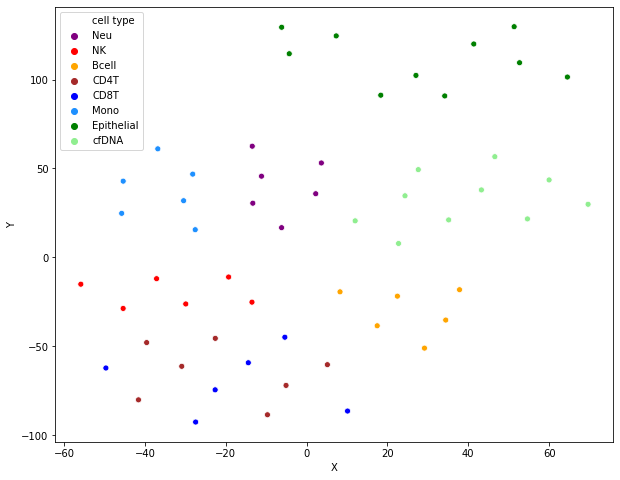

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen'],
              legend='full',
              data=tsne_df)

## check tSNE of reference profiles (FlowEPIC + epithelial) with all probes / preselect-glmnet probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dat2.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat.shape

(1049, 48)

In [ ]:
dat.head()

,Unnamed: 0,201868500150_R01C01,201868500150_R03C01,201868500150_R05C01,201868500150_R07C01,201868500150_R08C01,201868590193_R02C01,201868590193_R03C01,201868590193_R06C01,201868590206_R02C01,201868590206_R04C01,201868590206_R05C01,201868590206_R06C01,201868590206_R08C01,201868590243_R03C01,201868590243_R04C01,201868590243_R06C01,201868590243_R07C01,201868590243_R08C01,201868590267_R06C01,201868590267_R07C01,201868590267_R08C01,201869680009_R06C01,201869680009_R07C01,201869680009_R08C01,201869680030_R01C01,201869680030_R02C01,201869680030_R06C01,201870610056_R02C01,201870610056_R04C01,201870610056_R07C01,201870610056_R08C01,201870610111_R01C01,201870610111_R02C01,201870610111_R04C01,201870610111_R05C01,201870610111_R06C01,201870610111_R07C01,GSM3455823,GSM3455824,GSM3455826,GSM3455827,GSM3455828,GSM3455829,GSM3455852,GSM3455863,GSM3455864,GSM3455865
0,ref_phenotype,Neu,NK,Neu,Bcell,NK,NK,CD4T,Bcell,Neu,CD8T,CD8T,Mono,CD4T,CD4T,Mono,CD8T,Neu,Mono,CD8T,Mono,CD8T,Bcell,Mono,CD8T,CD4T,Bcell,CD4T,Neu,Bcell,NK,Mono,NK,Bcell,CD4T,Neu,CD4T,NK,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial
1,cg25131632,0.971745435320911,0.966122235502085,0.960595100743297,0.0313034376414144,0.96669614986778,0.96679927769015,0.963756884916829,0.0252056434879484,0.96973112971315,0.949728589718488,0.945383797065384,0.972562994720578,0.963990929130056,0.946504265315117,0.972855736300967,0.951400139660441,0.975253668768396,0.979345403055664,0.958535569230271,0.968845589484851,0.981718999175585,0.0327261753040995,0.970719630522552,0.907018118156197,0.957812475058431,0.0361641283237313,0.960905898647559,0.973714777103134,0.053708176562858,0.949657854188831,0.978066439862327,0.969210525172209,0.0290905020623569,0.93428065098844,0.975364831977614,0.939142485435918,0.970902756362818,0.96440954086286,0.969930041832842,0.935276487621967,0.928824268721781,0.957693658936428,0.891540565123025,0.977732073923892,0.965148300326241,0.966029321347495,0.961912528463037
2,cg11773391,0.95244670025673,0.949608095557457,0.951697982314786,0.0334035774698886,0.943788695240929,0.951393917257549,0.962053654912066,0.0192971834337917,0.952157193786399,0.949096608027857,0.956667855056352,0.960564224165546,0.95593719751334,0.942853743083238,0.956406328972188,0.9461240228286,0.94931306300664,0.955030498735455,0.950730325100963,0.953917590978249,0.971517503843156,0.0262438320549691,0.945199821829633,0.968077811319572,0.945537649834686,0.0280589465473942,0.957718045615435,0.944360020560853,0.0568424422255225,0.956648757315579,0.961371470695818,0.936645032743274,0.0231495689580641,0.924321278581033,0.953857657357992,0.94528953127435,0.960071277701437,0.931379950582316,0.925669937327391,0.896209910887042,0.904244312924724,0.925744313296207,0.932751839563127,0.966479755341603,0.941146814342806,0.943644671372373,0.921525785139348
3,cg08017518,0.949422599611754,0.926636883549485,0.956192002797565,0.0313463749573558,0.931967966349003,0.948823229314843,0.960623667645404,0.0258060553138929,0.94652145744077,0.960858009060356,0.96102136791304,0.957647974106444,0.962466055119653,0.958765411164799,0.955547783832656,0.952884181472236,0.95510510763999,0.966903617564939,0.961092554081586,0.961198644235999,0.968188484178453,0.0457937439617047,0.954261385366053,0.964540120171666,0.950864734909661,0.0278850336765096,0.964453623275826,0.947060224110916,0.0615539549687015,0.963368218406285,0.963585233828938,0.948290232250145,0.0256682447301635,0.950397648987509,0.960049663251337,0.964017619671648,0.94461927667796,0.953818367036682,0.946649152169948,0.934571130973965,0.93155487242825,0.942738231859967,0.944532847166273,0.964774351461058,0.950107468778342,0.94722012936827,0.827617555731626
4,cg04985318,0.954575768124791,0.955750855770838,0.956286140304365,0.0668262988764879,0.955062416133669,0.957607104683408,0.956268642615504,0.0352549318144509,0.948142796592923,0.960334556056244,0.961916166100965,0.960361285256214,0.963333125339681,0.95905319511

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
X.shape

(47, 1048)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048
201868500150_R01C01,0.971745435320911,0.95244670025673,0.949422599611754,0.954575768124791,0.967299934354491,0.944332840637343,0.91692031284979,0.949713588308601,0.945119478288505,0.95999444192611,0.879277507631429,0.970361102137078,0.935076074022699,0.937202781452247,0.960649909675795,0.94812534134898,0.973277685626468,0.94375592893169,0.923959627632503,0.945807030040257,0.951829069199417,0.949653963400058,0.941266230096301,0.929306956765235,0.943423654828655,0.916064846121772,0.940225249400274,0.966473001520567,0.938400564142994,0.932498166457548,0.923290711307697,0.953546957302,0.934349574451602,0.934886406959905,0.935409396475859,0.936075037332335,0.965523907214152,0.943480209705038,0.924569981524822,0.907177798707417,...,0.908796885187336,0.955831287616496,0.922298589388363,0.898317658182556,0.654074623454903,0.0941652596974092,0.0402725247534365,0.20941215858288,0.110799175214939,0.0788393023477448,0.024398676146915,0.0639074740830581,0.177819971745306,0.0282053400149184,0.0291871440113742,0.0133219943845304,0.0430130254614107,0.0334237824156971,0.0593230401481564,0.0998352636683259,0.0482842066550682,0.0404198321843087,0.131704569860284,0.0223493749312404,0.0271973213264119,0.0914665446986358,0.045871760843595,0.0679642628436643,0.0258482740406094,0.11525891027822,0.0365095650462055,0.0343972563073059,0.0820605235101647,0.0126374526811971,0.0446672511089633,0.0876062826379268,0.0621783152547011,0.0534795841521991,0.0261250770839393,0.0632062895480133
201868500150_R03C01,0.966122235502085,0.949608095557457,0.926636883549485,0.955750855770838,0.982799917441547,0.947227106597932,0.925624460428405,0.942239065214864,0.950942975776942,0.947602830214447,0.922695941858383,0.9738772359671,0.945546361141737,0.928422584976753,0.786901747773086,0.937862029525337,0.969411129810204,0.944153753729573,0.944605907443158,0.945588500989455,0.947366188429454,0.951041266711741,0.947134645114379,0.924727624238989,0.939482279481976,0.930405571815693,0.93999301476067,0.948843901412443,0.721378641881293,0.921180798153105,0.945203271554072,0.945225114100839,0.943319367419806,0.870052852318186,0.935296809057458,0.944375382443905,0.98313041237262,0.941849638831904,0.924205288033677,0.901400492539793,...,0.0451675852087434,0.125481867263933,0.0594323342932038,0.0592984396545915,0.0427620535596921,0.699877941273966,0.633547081960509,0.620785530609198,0.55813984112777,0.657203242607522,0.483827476615248,0.461328808587397,0.509288323267194,0.469686457510264,0.547377279400235,0.33427921623317,0.491987815151789,0.423721711350499,0.42593141562464,0.478351418550289,0.307641368327893,0.30223578952887,0.381813645585332,0.314258775106032,0.291725420199903,0.341164906469307,0.247089009058961,0.325777997442382,0.286585794049714,0.344410771849855,0.270402098923909,0.254929609216125,0.329497468705059,0.210916069342387,0.216678652780834,0.210089029194632,0.245927054966717,0.202157579630659,0.176319108741516,0.198400249460409
201868500150_R05C01,0.960595100743297,0.951697982314786,0.956192002797565,0.956286140304365,0.956000648185948,0.943515042231789,0.924440590001744,0.945622390134807,0.958507759642147,0.957632335480078,0.871459486433898,0.973152814849893,0.949230801965472,0.95439284659335,0.964376067955054,0.960571333202664,0.974342722576237,0.952798369815385,0.930593485683082,0.957983265539079,0.93061819964379,0.944156505768659,0.933708050798408,0.91802789868911,0.939965927902821,0.885644450523697,0.937958058721176,0.922560156922651,0.935260052070518,0.934975599322129,0.928274532045029,0.952254252158948,0.941455462523415,0.896152118550337,0.930365461290492,0.947587546071405,0.963628765130655,0.942362146721539,0.909281290114739,0.887735423739367,...,0

In [ ]:
y

<PandasArray>
[       'Neu',         'NK',        'Neu',      'Bcell',         'NK',
         'NK',       'CD4T',      'Bcell',        'Neu',       'CD8T',
       'CD8T',       'Mono',       'CD4T',       'CD4T',       'Mono',
       'CD8T',        'Neu',       'Mono',       'CD8T',       'Mono',
       'CD8T',      'Bcell',       'Mono',       'CD8T',       'CD4T',
      'Bcell',       'CD4T',        'Neu',      'Bcell',         'NK',
       'Mono',         'NK',      'Bcell',       'CD4T',        'Neu',
       'CD4T',         'NK', 'Epithelial', 'Epithelial', 'Epithelial',
 'Epithelial', 'Epithelial', 'Epithelial', 'Epithelial', 'Epithelial',
 'Epithelial', 'Epithelial']
Length: 47, dtype: object

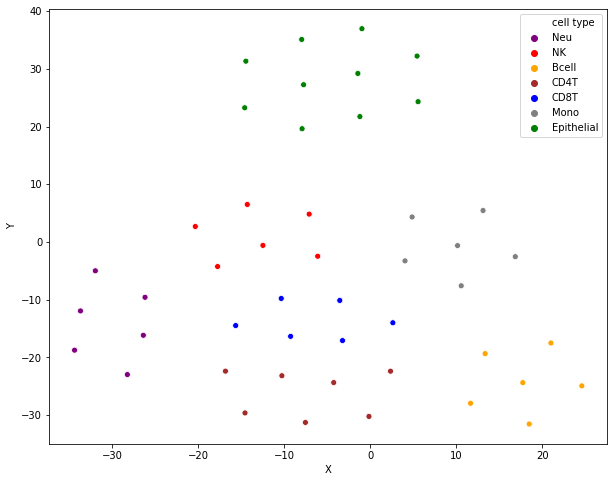

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'grey','green'],
              legend='full',
              data=tsne_df)

## Check tSNE of reference profiles (FlowSorted.DLPFC.450k & GSE66351  (31 Neuron/Glia)) with all probes

450k reference profiles for brain.

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dat2.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<Figure size 720x576 with 0 Axes>

In [ ]:
dat.shape

(485513, 121)

In [ ]:
dat.head()

,Unnamed: 0,813_N,1740_N,1740_G,1228_G,813_G,1228_N,165_N,529_N,4643_G,165_G,4643_N,529_G,1868_N,1226_G,4636_N,4636_G,1226_N,1868_G,1710_G,1103_N,1710_N,242_N,1103_G,242_G,1497_N,1739_N,5376_G,5376_N,1497_G,1739_G,1579_N,1579_G,5086_N,5086_G,4782_N,4637_N,1363_G,4782_G,1363_N,...,GSM2808897,GSM2808898,GSM2808899,GSM2808900,GSM2808901,GSM2808902,GSM2808903,GSM2808904,GSM2808905,GSM2808906,GSM2808907,GSM2808908,GSM2808909,GSM2808910,GSM2808911,GSM2808912,GSM2808913,GSM2808914,GSM2808915,GSM2808916,GSM2808917,GSM2808918,GSM2808919,GSM2808920,GSM2808921,GSM2808922,GSM2808923,GSM2808924,GSM2808925,GSM2808926,GSM2808927,GSM2808928,GSM2808929,GSM2808930,GSM2808931,GSM2808932,GSM2808933,GSM2808934,GSM2808935,GSM2808936
0,ref_phenotype,NeuN_pos,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_pos,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_pos,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_neg,NeuN_pos,NeuN_pos,NeuN_neg,NeuN_neg,NeuN_pos,...,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron,Glia,Neuron
1,cg00050873,0.527060077561536,0.511835688946823,0.619917235672074,0.802841676679558,0.468177015936199,0.828447931843914,0.830007364639378,0.828376081085676,0.498134639448399,0.804722467612873,0.49624446094783,0.80052028016886,0.512764632298245,0.83491604895196,0.494976436211515,0.532138288109636,0.842203577058952,0.490929728104792,0.502985669604967,0.817304411321519,0.506040016339252,0.804412917085706,0.798711861487158,0.786645197326368,0.924719524205198,0.482790223104097,0.878415101984115,0.909985462978761,0.868472788725985,0.494746374776897,0.533748853439684,0.514902122978434,0.903724713545982,0.539595551446191,0.875761249009945,0.49357725855039,0.474682270522708,0.862310171671325,0.514334861458328,...,0.493311969606747,0.50061138430892,0.493300492968983,0.505593814339463,0.856641389447497,0.868810801278723,0.790299658595739,0.80118259523415,0.861935473430008,0.936314894353087,0.849453574747044,0.865275839209469,0.512603456755725,0.504393513322162,0.883614197573182,0.934079216352242,0.54045807377342,0.554144791485592,0.897479497789044,0.947518567128676,0.897932486291552,0.910559050055564,0.864028455549937,0.880096541799505,0.892558138314967,0.911830088270193,0.595110224196181,0.546817628595208,0.514381159452269,0.901895018976321,0.514029422285123,0.53144030837208,0.517324261431682,0.598646820122705,0.877869011783084,0.874743852110184,0.902692234271823,0.940390972292873,0.526539973498065,0.517377272772612
2,cg00212031,0.472660147874434,0.505618871860902,0.511112128124144,0.0278407206962553,0.479161116573844,0.0249684312097197,0.0328195088185167,0.0313495652207755,0.500381214680328,0.0281562420681022,0.498940977778323,0.0287560506492582,0.500352117187078,0.0321085777754751,0.509557852432616,0.481377183384377,0.0240964354869822,0.504738721246162,0.471898574441524,0.0263122847809115,0.498351819101029,0.0695132341316421,0.0272518747320783,0.0399820047224294,0.0312839503295839,0.476751056832579,0.0252253646363014,0.0268963743557029,0.0265607070230695,0.513607886389684,0.506968771211947,0.502243042201474,0.461070756113398,0.539151006817516,0.0194394849686783,0.506703738180427,0.486673683427282,0.0206291801316191,0.508011106894739,...,0.501471391358946,0.485707667580858,0.493144392963618,0.481704855110588,0.0401257639192337,0.0349266727178649,0.0651134225402915,0.079505733692226,0.040577152577452,0.0486780137924687,0.0430688895974292,0.0439374068361253,0.491966075478706,0.488297350943705,0.0479664019854012,0.0509784862220868,0.491489287916596,0.496408014863021,0.0773482613896851,0.045283686859068,0.0528978577939401,0.0567707195751362,0.0448107794923997,0.0457260203300554,0.0636200091405426,0.0907723018397184,0.482402791787141

In [ ]:
dat = dat.iloc[:,1:]

In [ ]:
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
X.shape

(120, 485512)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,485473,485474,485475,485476,485477,485478,485479,485480,485481,485482,485483,485484,485485,485486,485487,485488,485489,485490,485491,485492,485493,485494,485495,485496,485497,485498,485499,485500,485501,485502,485503,485504,485505,485506,485507,485508,485509,485510,485511,485512
813_N,0.527060077561536,0.472660147874434,0.472460158376219,0.48559675001841,0.399637477812213,0.232911404982053,0.164011737315394,0.519270634646765,0.481706375826108,0.409283016868866,0.013460886568688,0.494042076119899,0.510585047950062,0.511244583293054,0.500365964523799,0.281543795616862,0.481241940990272,0.466683718924251,0.390886031533026,0.0166045149369286,0.450086308994219,0.471456176529796,0.519907648581852,0.0903500761605442,0.48671583773653,0.501401962533433,0.508098663361237,0.857464765036511,0.218991605544008,0.31314214427771,0.526741496630997,0.799694800379735,0.745149261725989,0.499424037998844,0.498344711119614,0.504736323438967,0.463161521730035,0.496467388468554,0.487020384352255,0.530712485432313,...,0.211359,0.102669,0.389221,0.790811,0.857353,0.626136,0.265765,0.890761,0.237343,0.768559,0.653608,0.262373,0.916722,0.569515,0.184259,0.465608,0.0973285,0.127682,0.499455,0.711066,0.51935,0.829611,0.599496,0.271987,0.284955,0.874487,0.122129,0.0878725,0.281122,0.208525,0.179243,0.0724691,0.54993,0.344396,0.743495,0.770928,0.506251,0.109653,0.410687,0.318291
1740_N,0.511835688946823,0.505618871860902,0.514857771719806,0.5116769595006,0.449380032454825,0.308093539256297,0.199404240354015,0.495679904382352,0.491944771042282,0.373144228092829,0.0128249806067242,0.522817463767323,0.500443312013882,0.485939400970888,0.49392027419052,0.203990574763305,0.485421519673444,0.482731701883863,0.430482791469514,0.0156840673145107,0.450516598001772,0.514788038536033,0.488228175554162,0.0865058814776191,0.488736514857826,0.495747096753652,0.490554365051009,0.801439612728623,0.193310172871119,0.353748877217074,0.489076588275146,0.715030281794777,0.616171720509349,0.458624029845806,0.469833449250564,0.477740150130052,0.503446047037164,0.513337859909399,0.460395778318756,0.497877367979679,...,0.155745,0.0870163,0.377046,0.722595,0.833432,0.565196,0.261612,0.798628,0.202288,0.744189,0.589359,0.173731,0.905657,0.49735,0.15607,0.424129,0.084507,0.123654,0.434971,0.653953,0.502461,0.842198,0.542469,0.298579,0.240891,0.835591,0.105227,0.0480487,0.224705,0.245699,0.161515,0.05495,0.520522,0.298132,0.742218,0.6656,0.488538,0.0953839,0.34634,0.285823
1740_G,0.619917235672074,0.511112128124144,0.48401681086187,0.489038105332991,0.463547343964236,0.208042367841002,0.215263850018773,0.70249203510876,0.532432080402734,0.366787878945002,0.0134295291830008,0.516297949414282,0.511129812957126,0.536092493332377,0.640635697518198,0.254007664687792,0.668448051163026,0.487794805679235,0.342979265326204,0.0143160754213574,0.48592237667876,0.424226926879876,0.80808287378035,0.0760309655332387,0.465829047813947,0.483356360996468,0.530370164802336,0.853937317012089,0.170334928362142,0.327238060761045,0.499533968688924,0.705411588987174,0.651303695455019,0.513188559021107,0.400802652402603,0.522377755048024,0.483649585499379,0.678544480186042,0.499504414298034,0.508439529584434,...,0.186196,0.083853,0.0955512,0.238377,0.243208,0.302247,0.0439347,0.323987,0.0794929,0.13913,0.162781,0.0762683,0.339706,0.131845,0.0458395,0.118811,0.0559411,0.0689482,0.0336754,0.0498251,0.104936,0.307833,0.0552182,0.158459,0.0673697,0.234224,0.0562334,0.0267857,0.128413,0.180864,0.0676093,0.0478387,0.0800412,0.0936387,0.171065,0.182814,0.0791192,0.0226133,0.0660429,0.147715
1228_G,0.802841676679558,0.0278407206962553,0.685452095697019,0.033640763364443,0.831940163573716,0.0507803113710949,0.0181955787441465,0.97058280193166,0.979130061303218,0.031049648743292,0.0144221533066614,0.0196493921884049,0.0273292014751194,0.982819426613521,0.950670856842426,0.0384366479801408,0.90774580678248

In [ ]:
y

<PandasArray>
['NeuN_pos', 'NeuN_pos', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_pos',
 'NeuN_pos', 'NeuN_pos', 'NeuN_neg', 'NeuN_neg',
 ...
     'Glia',   'Neuron',     'Glia',   'Neuron',     'Glia',   'Neuron',
     'Glia',   'Neuron',     'Glia',   'Neuron']
Length: 120, dtype: object

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,-20.716522,-0.012679,NeuN_pos
1,-19.734869,1.007084,NeuN_pos
2,25.752945,-0.002816,NeuN_neg
3,26.455046,-6.976223,NeuN_neg
4,23.267942,-3.027805,NeuN_neg


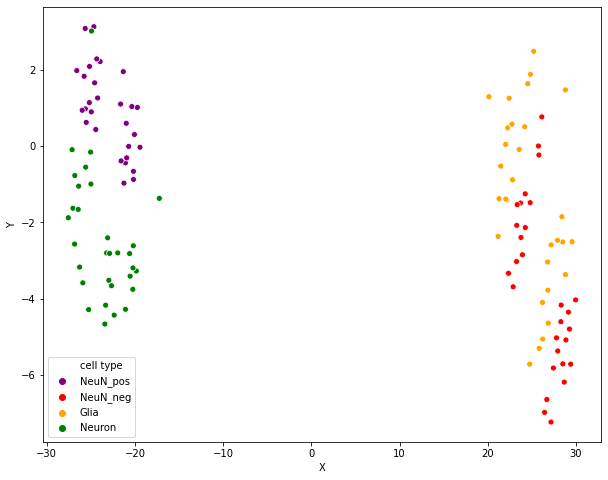

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','green'],
              legend='full',
              data=tsne_df)

## ## check tSNE of reference profiles BrainEPIC with all probes

In [ ]:
dat.shape

(866092, 18)

In [ ]:
dat.head()

,Unnamed: 0,GSM3024464,GSM3024465,GSM3024466,GSM3024467,GSM3024468,GSM3024469,GSM3024470,GSM3024471,GSM3024472,GSM3024473,GSM3024474,GSM3024475,GSM3024476,GSM3024477,GSM3024478,GSM3024479,GSM3024480
0,ref_phenotype,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_neg,NeuN_pos,NeuN_pos,NeuN_pos,NeuN_pos,NeuN_pos
1,cg18478105,0.0130193895064085,0.00927636134504539,0.015596292173812,0.00968334947769502,0.015180438989958,0.0102869624418574,0.0144886017470674,0.0114515283425429,0.0164632155084968,0.0144890125685115,0.0143650982002246,0.0150005483619723,0.0135154743871504,0.0150101851025408,0.0165872291050598,0.0127322231954643,0.0137168068943262
2,cg09835024,0.0323847998173874,0.027624360330016,0.0216709613863583,0.0290923250597384,0.0253054666177845,0.026302201996151,0.0325250429122033,0.0254305157719366,0.0343070187253462,0.0266546066345182,0.0255753005425677,0.0264224437355814,0.0243333720891705,0.0394427038633712,0.0246442416380788,0.0293403556219544,0.0263438946068267
3,cg14361672,0.923949988280243,0.962884061199943,0.847370943903116,0.964046133725821,0.9648395240639,0.938585655858672,0.939974018858854,0.876314181026479,0.945556639833733,0.936438674275059,0.927045184421927,0.739185524846359,0.958676177281453,0.959515897381149,0.970881650510097,0.965269745588107,0.963650651804417
4,cg01763666,0.927662544340872,0.966002719437427,0.940014432995641,0.971414550509194,0.89460446711235,0.947866232802984,0.907104687586759,0.870882262378376,0.648115829650854,0.936018514763727,0.897654195630286,0.92916808585712,0.947171482447169,0.924256281266407,0.938310549431741,0.664416485268583,0.877905203004725


In [ ]:
dat = dat.iloc[:,1:]

In [ ]:
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
X.shape

(17, 866091)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,866052,866053,866054,866055,866056,866057,866058,866059,866060,866061,866062,866063,866064,866065,866066,866067,866068,866069,866070,866071,866072,866073,866074,866075,866076,866077,866078,866079,866080,866081,866082,866083,866084,866085,866086,866087,866088,866089,866090,866091
GSM3024464,0.0130193895064085,0.0323847998173874,0.923949988280243,0.927662544340872,0.816426531039596,0.0410118270448497,0.471072073164059,0.324500112601622,0.0305204376490916,0.0204362689769837,0.963619689048944,0.0226779789807441,0.958485833374219,0.289431738248441,0.901444433132352,0.103596162602146,0.0392342704368564,0.0251145322357788,0.591225819399451,0.0197873969836618,0.843841238097921,0.497783032539439,0.0183626423648857,0.0183625176448544,0.0235014433068473,0.966241792427252,0.0179228434464034,0.0405721993934215,0.588241306132131,0.0204337352806033,0.0188018186163912,0.953158872250312,0.013558330106047,0.0434535140317092,0.0244322261147733,0.0129176535077791,0.0192482516012415,0.132813543044932,0.0199846653631368,0.0481639792050767,...,0.819499,0.745938,0.640502,0.87362,0.883616,0.711439,0.898516,0.256631,0.466937,0.842697,0.685372,0.401266,0.348671,0.816065,0.880063,0.801939,0.885471,0.895212,0.428913,0.301373,0.788782,0.898876,0.87667,0.121435,0.913779,0.694917,0.655581,0.872802,0.126707,0.815618,0.826978,0.69386,0.380111,0.819789,0.838824,0.85827,0.838798,0.819231,0.0692426,0.701901
GSM3024465,0.00927636134504539,0.027624360330016,0.962884061199943,0.966002719437427,0.883527930865054,0.024504764179349,0.33324608160705,0.205905057995352,0.0119317276857512,0.0169668516573471,0.977100620173934,0.0149780603662087,0.963751845673263,0.238957107282285,0.963713846930027,0.0571803290732853,0.0268169014489031,0.0200132695390284,0.637659026285792,0.0148447199082259,0.800121787447613,0.424126510874224,0.0136534628567957,0.0159246340774991,0.0220200759500518,0.983391994960996,0.0122692575461565,0.0136457971054442,0.305737219589739,0.012552029901636,0.0139136350292068,0.951105822797308,0.0127973594327084,0.0399555260784749,0.0186702290307112,0.00959975866236889,0.0155720951860349,0.0463723013583198,0.014811624817331,0.0290902641916436,...,0.826391,0.578877,0.611864,0.881724,0.886945,0.706816,0.872852,0.215309,0.374993,0.854912,0.696158,0.350521,0.306863,0.725347,0.839043,0.847995,0.891684,0.890378,0.399385,0.246174,0.805581,0.902589,0.881587,0.133642,0.898471,0.745741,0.543364,0.891868,0.0930389,0.811291,0.708333,0.720211,0.297057,0.808845,0.854593,0.773169,0.833697,0.811608,0.103297,0.685889
GSM3024466,0.015596292173812,0.0216709613863583,0.847370943903116,0.940014432995641,0.899296237569966,0.0509844368988872,0.377803207251569,0.325552852325609,0.0360546904075143,0.0185865478298951,0.958198828230434,0.0211948458363558,0.944647956745046,0.238235159493608,0.953978590593789,0.107168194604069,0.0729155170899188,0.0210946846512648,0.900123433910057,0.0192676312336532,0.920000734084265,0.331057952550608,0.0178669561768975,0.0199379635441764,0.0249148664502777,0.967644607315256,0.0137962590053378,0.0200207265867199,0.463181183395527,0.0152855495618235,0.019393980692847,0.971342514970543,0.0141436075072179,0.0604185880147671,0.0435775342010102,0.0134559686881821,0.0187452287456941,0.0276275977292559,0.0159905808644135,0.0435473836641334,...,0.823014,0.508648,0.655092,0.894546,0.891667,0.757305,0.876616,0.310881,0.442155,0.819742,0.630889,0.345986,0.357112,0.73494,0.892086,0.828827,0.910594,0.858804,0.411133,0.336495,0.764782,0.910775,0.879077,0.169034,0.866885,0.802691,0.584193,0.879701,0.0522324,0.824393,0.791236,0.901563,0.216798,0.783573,0.857113,0.821474,0.860531,0.834767,0.0793244,0.664515
GSM3024467,0.00968334947769502,0.0290923250597384,0.964046133725821,0.971414550509194,0.883858994437319,0.0339072410230673,0.034448483856627,0.0172504950872758,0.0298436435272131,0.0156102649964555,0.974687633184754,0.0144195078171753,0.973753500570876,0

In [ ]:
y

<PandasArray>
['NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg',
 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg',
 'NeuN_pos', 'NeuN_pos', 'NeuN_pos', 'NeuN_pos', 'NeuN_pos']
Length: 17, dtype: object

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,2.972113,-13.786730,NeuN_neg
1,-7.288966,86.150291,NeuN_neg
2,38.049393,65.587624,NeuN_neg
3,-42.227043,6.162611,NeuN_neg
4,-63.238548,-41.294518,NeuN_neg


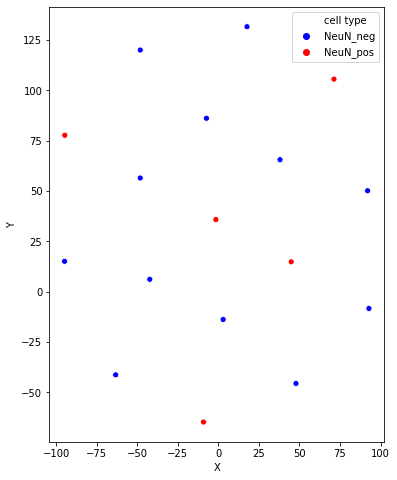

In [ ]:
plt.figure(figsize=(6,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['blue','red'],
              legend='full',
              data=tsne_df)

## check tSNE of reference profiles BrainEPIC with Brain450k oneVsall-ttest ( 95) probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/dat1.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
GSM3024464,0.521190893341623,0.412260867372484,0.453675484236868,0.485111190511141,0.149324445488378,0.619038480476389,0.576457456978033,0.587496603748493,0.225128321213501,0.510785381840503,0.51196556975282,0.51406153208035,0.62902703069119,0.364787121364017,0.404554533544794,0.282097445238825,0.395596583608097,0.418242079970475,0.520974043648076,0.363935550554953,0.448155780297347,0.471978541293573,0.333077924585749,0.473125783192738,0.423364674155535,0.338001554119043,0.517344720041256,0.538936210515668,0.412154331679405,0.506891780555245,0.395857155609561,0.555951994515991,0.459296699127225,0.263941470054359,0.424841726572795,0.429532054069801,0.569823872927277,0.595988148013388,0.365049314993012,0.510795910244135,...,0.32344135743384,0.509230077068863,0.554396382434453,0.480622263181571,0.433747478084953,0.398114226648402,0.494806755581135,0.497685748592777,0.214724984081172,0.58750674099748,0.507243199973797,0.533804129622123,0.401474008224754,0.480134145949128,0.426042580093093,0.520186486311373,0.524585774905542,0.418623450944885,0.46787809325308,0.461141777173775,0.332228618888566,0.565490273582453,0.315408412783382,0.509961914459397,0.509459143002133,0.478154069514234,0.582639736008567,0.496333044999774,0.61217703971521,0.427573650218608,0.444490151750255,0.515812335146515,0.669309328470759,0.422892133907716,0.461378017743599,0.435030895526383,0.419852312895139,0.368870310988386,0.375441169663882,0.515272394782556
GSM3024465,0.845926120301932,0.178919787941676,0.774211550899085,0.776046354139468,0.0661823998786278,0.81008671531355,0.867219117850029,0.78860213991861,0.703362947010062,0.226189732775006,0.23141555053567,0.377281358775346,0.841996387689556,0.581654176565797,0.139060755497075,0.0602324469817017,0.724232998683385,0.774674790181123,0.918658679933037,0.766940996304126,0.785706325496209,0.872760185062925,0.630938283134478,0.827836499035522,0.659067301274928,0.58502388325716,0.796266932900655,0.12888466175164,0.841878535719707,0.258045815918654,0.691666046392639,0.790584420635785,0.849901098533551,0.531867636485506,0.178088787340532,0.15518040598293,0.272726128449585,0.898216255082083,0.781522018711868,0.802580668787285,...,0.0789916565988327,0.210041686598346,0.855322087832629,0.770367428346723,0.162737415639677,0.214215538814697,0.241283762143016,0.225001604373538,0.568357747216385,0.738222769085546,0.221627462540374,0.153267468013265,0.190171185641129,0.758055815560548,0.226118699117083,0.290644014944782,0.267559193881542,0.172154151706291,0.283583649464755,0.220898653267824,0.148312334519958,0.298313404599079,0.111796811416384,0.281332208660518,0.784140899957173,0.707626128240899,0.271196258554779,0.835418294096011,0.324166079881778,0.812344721909942,0.220361556457131,0.269488705838335,0.393324654952321,0.760843396054339,0.72507774531213,0.662929328381348,0.130958072886481,0.133144583096536,0.654134463463242,0.212243480705248
GSM3024466,0.89575713530297,0.118418132645398,0.937164836204055,0.888505629975017,0.0744756286166426,0.914945226991387,0.898371219560937,0.878887498699709,0.755148748786032,0.0975615494246038,0.175184980408329,0.297308216564129,0.928703763157856,0.789470367876804,0.156803751676456,0.0948376128497354,0.793623449879173,0.833729508459391,0.876249256682496,0.887509347223517,0.841690825913411,0.943039463570176,0.747449113326255,0.900150723574019,0.851542981668364,0.723359412551445,0.829691199769462,0.135076811914503,0.907099641840428,0.307166838882825,0.757761267876333,0.936576459612777,0.906222225788403,0.613047265974203,0.187933426165772,0.29515118982982,0.269856840022583,0.871825078904976,0.811143392608805,0.922027660063893,...,0.0606900076568647,0.124549535427501,0.889488606549157,0.58593321212117,0.120561468323577,0.113806131844439,0.142130607951507,0.2

In [ ]:
y

<PandasArray>
['NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg',
 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg', 'NeuN_neg',
 'NeuN_pos', 'NeuN_pos', 'NeuN_pos', 'NeuN_pos', 'NeuN_pos']
Length: 17, dtype: object

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,2.972113,-13.786730,NeuN_neg
1,-7.288966,86.150291,NeuN_neg
2,38.049393,65.587624,NeuN_neg
3,-42.227043,6.162611,NeuN_neg
4,-63.238548,-41.294518,NeuN_neg


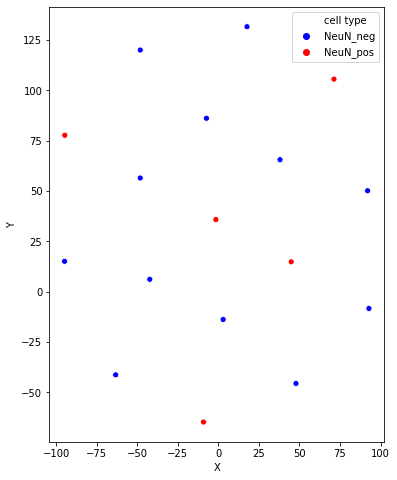

In [ ]:
plt.figure(figsize=(6,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['blue','red'],
              legend='full',
              data=tsne_df)

## check tSNE of reference profiles BrainEPIC with Brain450k preselect-glmnet (285) probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/dat2.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
  X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285
GSM3024464,0.521190893341623,0.571497144319478,0.412260867372484,0.467535274273064,0.453675484236868,0.391614409778298,0.55628904426224,0.577684497354686,0.485111190511141,0.149324445488378,0.619038480476389,0.576457456978033,0.816022766013378,0.248998629996141,0.587496603748493,0.213633785069798,0.225128321213501,0.510785381840503,0.631039775533088,0.480936291488115,0.385034079083575,0.259359875983977,0.429457992483373,0.51196556975282,0.51406153208035,0.521027170417189,0.583602401096059,0.676638960848509,0.324840085074308,0.62902703069119,0.515051096748412,0.519983058199664,0.327423237965054,0.364787121364017,0.554596913683361,0.603137843658563,0.404554533544794,0.282097445238825,0.395596583608097,0.452379119504812,...,0.496333044999774,0.573633768616904,0.388853364859105,0.524682052734594,0.595874729070308,0.61217703971521,0.598758397607817,0.522225323898709,0.519938086695554,0.427573650218608,0.444490151750255,0.515812335146515,0.669309328470759,0.480738463645894,0.474222866558591,0.43578106661813,0.4880199984331,0.422892133907716,0.399528314562429,0.277940259373082,0.513999339021453,0.584655295567075,0.461378017743599,0.477076593157835,0.445111672960295,0.511094817019795,0.435030895526383,0.578226936559355,0.364049862344746,0.56518976395318,0.636111234833,0.419852312895139,0.493084035584909,0.368870310988386,0.444005235492174,0.510709250405969,0.55021448427166,0.375441169663882,0.447684376020213,0.515272394782556
GSM3024465,0.845926120301932,0.868210575048191,0.178919787941676,0.712717678569642,0.774211550899085,0.866207784650479,0.899791332970096,0.710169838396855,0.776046354139468,0.0661823998786278,0.81008671531355,0.867219117850029,0.889962095321528,0.051807125391091,0.78860213991861,0.12948668166539,0.703362947010062,0.226189732775006,0.826134383525423,0.832940989381301,0.577706362240816,0.459119948438309,0.876169581642139,0.23141555053567,0.377281358775346,0.808543618846068,0.889360165830864,0.928252183058218,0.494106380766842,0.841996387689556,0.870655967702228,0.78968066615038,0.14125987942015,0.581654176565797,0.836222615985059,0.945934515725268,0.139060755497075,0.0602324469817017,0.724232998683385,0.799991421450312,...,0.835418294096011,0.406534232681636,0.218269451253248,0.767262705975687,0.271496460769732,0.324166079881778,0.703769719430465,0.785985060397832,0.84476978756713,0.812344721909942,0.220361556457131,0.269488705838335,0.393324654952321,0.137681037439821,0.26462915295366,0.185925687543758,0.226116644973753,0.760843396054339,0.209710156379945,0.0805691768430486,0.307429907130838,0.336819491633438,0.72507774531213,0.29495884161479,0.166304853872107,0.802167546765228,0.662929328381348,0.331364232775433,0.22827285252992,0.825346356741557,0.831234541635471,0.130958072886481,0.148197340221377,0.133144583096536,0.321772935661106,0.794501903443283,0.279932947824497,0.654134463463242,0.106583554551132,0.212243480705248
GSM3024466,0.89575713530297,0.950355649633091,0.118418132645398,0.744276035832768,0.937164836204055,0.909460601595634,0.922594457000552,0.798551762867553,0.888505629975017,0.0744756286166426,0.914945226991387,0.898371219560937,0.937363430444444,0.0855139430167779,0.878887498699709,0.13278100237907,0.755148748786032,0.0975615494246038,0.934304130269118,0.912998797457297,0.828212448335382,0.638012447572914,0.900697373451077,0.175184980408329,0.297308216564129,0.905360908073425,0.97029171019776,0.961554443940269,0.680208196015928,0.928703763157856,0.87636453461273,0.778326816055278,0.123107660443091,0.789470367876804,0.912393158059604,0.95159634076022,0.156803751676456,0.0948376128497354,0.793623449879173,0.877776317996392,...,0.906877707220726,0.406979432098146,0.205467682807234,0.857331120027064,0.332379240318298,0.412439405

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,2.972113,-13.786730,NeuN_neg
1,-7.288966,86.150291,NeuN_neg
2,38.049393,65.587624,NeuN_neg
3,-42.227043,6.162611,NeuN_neg
4,-63.238548,-41.294518,NeuN_neg


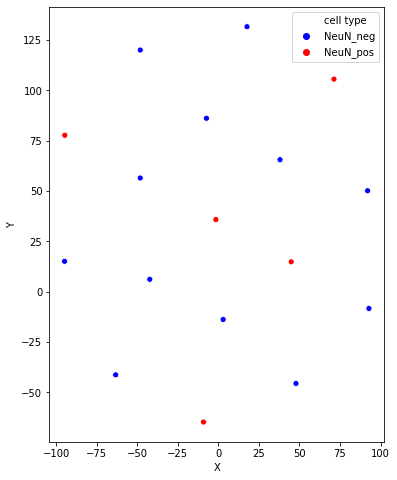

In [ ]:
plt.figure(figsize=(6,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['blue','red'],
              legend='full',
              data=tsne_df)


In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/dat2.csv")



<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

In [ ]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})
tsne_df.head()

,X,Y,cell type
0,2.972113,-13.786730,NeuN_neg
1,-7.288966,86.150291,NeuN_neg
2,38.049393,65.587624,NeuN_neg
3,-42.227043,6.162611,NeuN_neg
4,-63.238548,-41.294518,NeuN_neg


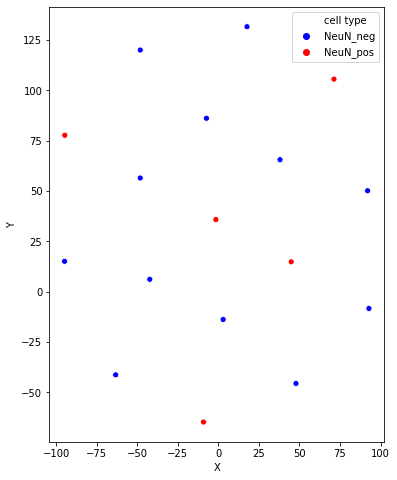

In [ ]:
plt.figure(figsize=(6,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['blue','red'],
              legend='full',
              data=tsne_df)


## clustering (dendrogram, heatmap) - EPIC reference data, onevsAllttest probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/EPICdat_probes_oneVsAllttest.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat.shape

(601, 38)

In [ ]:
dat.head()

,Unnamed: 0,201868500150_R01C01,201868500150_R03C01,201868500150_R05C01,201868500150_R07C01,201868500150_R08C01,201868590193_R02C01,201868590193_R03C01,201868590193_R06C01,201868590206_R02C01,201868590206_R04C01,201868590206_R05C01,201868590206_R06C01,201868590206_R08C01,201868590243_R03C01,201868590243_R04C01,201868590243_R06C01,201868590243_R07C01,201868590243_R08C01,201868590267_R06C01,201868590267_R07C01,201868590267_R08C01,201869680009_R06C01,201869680009_R07C01,201869680009_R08C01,201869680030_R01C01,201869680030_R02C01,201869680030_R06C01,201870610056_R02C01,201870610056_R04C01,201870610056_R07C01,201870610056_R08C01,201870610111_R01C01,201870610111_R02C01,201870610111_R04C01,201870610111_R05C01,201870610111_R06C01,201870610111_R07C01
0,ref_phenotype,Neu,NK,Neu,Bcell,NK,NK,CD4T,Bcell,Neu,CD8T,CD8T,Mono,CD4T,CD4T,Mono,CD8T,Neu,Mono,CD8T,Mono,CD8T,Bcell,Mono,CD8T,CD4T,Bcell,CD4T,Neu,Bcell,NK,Mono,NK,Bcell,CD4T,Neu,CD4T,NK
1,cg25131632,0.971745435320911,0.966122235502085,0.960595100743297,0.0313034376414144,0.96669614986778,0.96679927769015,0.963756884916829,0.0252056434879484,0.96973112971315,0.949728589718488,0.945383797065384,0.972562994720578,0.963990929130056,0.946504265315117,0.972855736300967,0.951400139660441,0.975253668768396,0.979345403055664,0.958535569230271,0.968845589484851,0.981718999175585,0.0327261753040995,0.970719630522552,0.907018118156197,0.957812475058431,0.0361641283237313,0.960905898647559,0.973714777103134,0.053708176562858,0.949657854188831,0.978066439862327,0.969210525172209,0.0290905020623569,0.93428065098844,0.975364831977614,0.939142485435918,0.970902756362818
2,cg11773391,0.95244670025673,0.949608095557457,0.951697982314786,0.0334035774698886,0.943788695240929,0.951393917257549,0.962053654912066,0.0192971834337917,0.952157193786399,0.949096608027857,0.956667855056352,0.960564224165546,0.95593719751334,0.942853743083238,0.956406328972188,0.9461240228286,0.94931306300664,0.955030498735455,0.950730325100963,0.953917590978249,0.971517503843156,0.0262438320549691,0.945199821829633,0.968077811319572,0.945537649834686,0.0280589465473942,0.957718045615435,0.944360020560853,0.0568424422255225,0.956648757315579,0.961371470695818,0.936645032743274,0.0231495689580641,0.924321278581033,0.953857657357992,0.94528953127435,0.960071277701437
3,cg08017518,0.949422599611754,0.926636883549485,0.956192002797565,0.0313463749573558,0.931967966349003,0.948823229314843,0.960623667645404,0.0258060553138929,0.94652145744077,0.960858009060356,0.96102136791304,0.957647974106444,0.962466055119653,0.958765411164799,0.955547783832656,0.952884181472236,0.95510510763999,0.966903617564939,0.961092554081586,0.961198644235999,0.968188484178453,0.0457937439617047,0.954261385366053,0.964540120171666,0.950864734909661,0.0278850336765096,0.964453623275826,0.947060224110916,0.0615539549687015,0.963368218406285,0.963585233828938,0.948290232250145,0.0256682447301635,0.950397648987509,0.960049663251337,0.964017619671648,0.94461927667796
4,cg23370196,0.944332840637343,0.947227106597932,0.943515042231789,0.0380711958180854,0.948637932463779,0.949033344900711,0.949287398169364,0.0259653903843091,0.958664174487882,0.93552902400441,0.955963041677317,0.957566155068499,0.957799262836597,0.945875183020978,0.951617419932274,0.938135972870045,0.958789949719383,0.958965220204044,0.953858726449707,0.954087063006564,0.96584894649902,0.0363282816728625,0.956784338940804,0.96053433130804,0.940100066581164,0.0294532895206802,0.955941342392531,0.955423794688909,0.0656770264023886,0.958894673480861,0.956562116310152,0.951534100718695,0.0295560794645726,0.920223520359076,0.951485340045801,0.948194716279407,0.956051776937546


In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:]
X = dat.iloc[1:,:]
X = X.T

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
201868500150_R01C01,0.971745435320911,0.95244670025673,0.949422599611754,0.944332840637343,0.945119478288505,0.941611620135905,0.943423654828655,0.940497342935286,0.954575768124791,0.937202781452247,0.94375592893169,0.91692031284979,0.949713588308601,0.934349574451602,0.945807030040257,0.916064846121772,0.935076074022699,0.929265528775155,0.941266230096301,0.967299934354491,0.945112618989826,0.94812534134898,0.93898979962341,0.943461142731993,0.95999444192611,0.932498166457548,0.951829069199417,0.953546957302,0.970361102137078,0.950445879331541,0.970231667708359,0.938400564142994,0.940225249400274,0.936075037332335,0.973277685626468,0.94031751222758,0.960649909675795,0.942582408121131,0.879277507631429,0.932644212415257,...,0.0768937092903711,0.0371425697624541,0.0468771285232438,0.0941652596974092,0.0287278260847322,0.0267159603466806,0.122573581277915,0.143489245431621,0.341623269954023,0.11840187109968,0.0524655812548591,0.13346345185132,0.0464609015330208,0.248584731196481,0.24963172633282,0.259731501291778,0.0490759402106369,0.0391278111600821,0.0374631495473993,0.0536849193638344,0.264125047277984,0.442100278821353,0.0403201234994546,0.0521563282979852,0.0245313496176706,0.0412971443622417,0.0402725247534365,0.0917996677344421,0.124754081196552,0.0902764048315345,0.370285249713396,0.434931786764391,0.221202271557943,0.108992939104954,0.046679600762699,0.0321859095276221,0.0678244901089397,0.225591654805346,0.228348495910595,0.0209235910372255
201868500150_R03C01,0.966122235502085,0.949608095557457,0.926636883549485,0.947227106597932,0.950942975776942,0.945601245790895,0.939482279481976,0.943952642868964,0.955750855770838,0.928422584976753,0.944153753729573,0.925624460428405,0.942239065214864,0.943319367419806,0.945588500989455,0.930405571815693,0.945546361141737,0.93507752148324,0.947134645114379,0.982799917441547,0.938276342183569,0.937862029525337,0.937848603774868,0.932012336558058,0.947602830214447,0.921180798153105,0.947366188429454,0.945225114100839,0.9738772359671,0.938121514875844,0.971022247765772,0.721378641881293,0.93999301476067,0.944375382443905,0.969411129810204,0.935883562227695,0.786901747773086,0.929592938504345,0.922695941858383,0.939660024786207,...,0.856200315850599,0.863809693507462,0.706503180257962,0.699877941273966,0.849865950523154,0.849635392120407,0.766281143252139,0.916116771705293,0.90105992798006,0.814782200078445,0.76408567467955,0.871848886170424,0.726686444342015,0.644562223015537,0.748932185228035,0.76898367016462,0.695986758234293,0.790627041357518,0.710768968876451,0.77043508734886,0.781397067754436,0.896891607708072,0.743623133477242,0.670264678734759,0.652250040586536,0.70652073807708,0.633547081960509,0.802068062701788,0.79277964433526,0.684756678199657,0.843793495159872,0.927963456381298,0.778911264871275,0.757723208868042,0.6491597513307,0.711694044371346,0.574418136729013,0.753769464423901,0.785288105656605,0.589116804825446
201868500150_R05C01,0.960595100743297,0.951697982314786,0.956192002797565,0.943515042231789,0.958507759642147,0.954922944713201,0.939965927902821,0.943256117975115,0.956286140304365,0.95439284659335,0.952798369815385,0.924440590001744,0.945622390134807,0.941455462523415,0.957983265539079,0.885644450523697,0.949230801965472,0.917055176377361,0.933708050798408,0.956000648185948,0.943163826724768,0.960571333202664,0.941019314743792,0.946862694365958,0.957632335480078,0.934975599322129,0.93061819964379,0.952254252158948,0.973152814849893,0.958869283876747,0.946285868608063,0.935260052070518,0.937958058721176,0.947587546071405,0.974342722576237,0.961120024757575,0.964376067955054,0.952124524068207,0.871459486433898,0.93234370522843,...,0.0694261450009176,0.0290379116992091,0.0498298237971783,0

In [ ]:
X.index = range(37)

In [ ]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600
0,0.971745435320911,0.95244670025673,0.949422599611754,0.944332840637343,0.945119478288505,0.941611620135905,0.943423654828655,0.940497342935286,0.954575768124791,0.937202781452247,0.94375592893169,0.91692031284979,0.949713588308601,0.934349574451602,0.945807030040257,0.916064846121772,0.935076074022699,0.929265528775155,0.941266230096301,0.967299934354491,0.945112618989826,0.94812534134898,0.93898979962341,0.943461142731993,0.95999444192611,0.932498166457548,0.951829069199417,0.953546957302,0.970361102137078,0.950445879331541,0.970231667708359,0.938400564142994,0.940225249400274,0.936075037332335,0.973277685626468,0.94031751222758,0.960649909675795,0.942582408121131,0.879277507631429,0.932644212415257,...,0.0768937092903711,0.0371425697624541,0.0468771285232438,0.0941652596974092,0.0287278260847322,0.0267159603466806,0.122573581277915,0.143489245431621,0.341623269954023,0.11840187109968,0.0524655812548591,0.13346345185132,0.0464609015330208,0.248584731196481,0.24963172633282,0.259731501291778,0.0490759402106369,0.0391278111600821,0.0374631495473993,0.0536849193638344,0.264125047277984,0.442100278821353,0.0403201234994546,0.0521563282979852,0.0245313496176706,0.0412971443622417,0.0402725247534365,0.0917996677344421,0.124754081196552,0.0902764048315345,0.370285249713396,0.434931786764391,0.221202271557943,0.108992939104954,0.046679600762699,0.0321859095276221,0.0678244901089397,0.225591654805346,0.228348495910595,0.0209235910372255
1,0.966122235502085,0.949608095557457,0.926636883549485,0.947227106597932,0.950942975776942,0.945601245790895,0.939482279481976,0.943952642868964,0.955750855770838,0.928422584976753,0.944153753729573,0.925624460428405,0.942239065214864,0.943319367419806,0.945588500989455,0.930405571815693,0.945546361141737,0.93507752148324,0.947134645114379,0.982799917441547,0.938276342183569,0.937862029525337,0.937848603774868,0.932012336558058,0.947602830214447,0.921180798153105,0.947366188429454,0.945225114100839,0.9738772359671,0.938121514875844,0.971022247765772,0.721378641881293,0.93999301476067,0.944375382443905,0.969411129810204,0.935883562227695,0.786901747773086,0.929592938504345,0.922695941858383,0.939660024786207,...,0.856200315850599,0.863809693507462,0.706503180257962,0.699877941273966,0.849865950523154,0.849635392120407,0.766281143252139,0.916116771705293,0.90105992798006,0.814782200078445,0.76408567467955,0.871848886170424,0.726686444342015,0.644562223015537,0.748932185228035,0.76898367016462,0.695986758234293,0.790627041357518,0.710768968876451,0.77043508734886,0.781397067754436,0.896891607708072,0.743623133477242,0.670264678734759,0.652250040586536,0.70652073807708,0.633547081960509,0.802068062701788,0.79277964433526,0.684756678199657,0.843793495159872,0.927963456381298,0.778911264871275,0.757723208868042,0.6491597513307,0.711694044371346,0.574418136729013,0.753769464423901,0.785288105656605,0.589116804825446
2,0.960595100743297,0.951697982314786,0.956192002797565,0.943515042231789,0.958507759642147,0.954922944713201,0.939965927902821,0.943256117975115,0.956286140304365,0.95439284659335,0.952798369815385,0.924440590001744,0.945622390134807,0.941455462523415,0.957983265539079,0.885644450523697,0.949230801965472,0.917055176377361,0.933708050798408,0.956000648185948,0.943163826724768,0.960571333202664,0.941019314743792,0.946862694365958,0.957632335480078,0.934975599322129,0.93061819964379,0.952254252158948,0.973152814849893,0.958869283876747,0.946285868608063,0.935260052070518,0.937958058721176,0.947587546071405,0.974342722576237,0.961120024757575,0.964376067955054,0.952124524068207,0.871459486433898,0.93234370522843,...,0.0694261450009176,0.0290379116992091,0.0498298237971783,0.0891613001780243,0.0277494728820115,0.025911581158280

In [ ]:
X = X.astype(float)


In [ ]:
print(X.dtypes)

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
596    float64
597    float64
598    float64
599    float64
600    float64
Length: 600, dtype: object


In [ ]:
y.index = range(37)

In [ ]:
my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange"]))
row_colors = y.map(my_palette)


In [ ]:
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

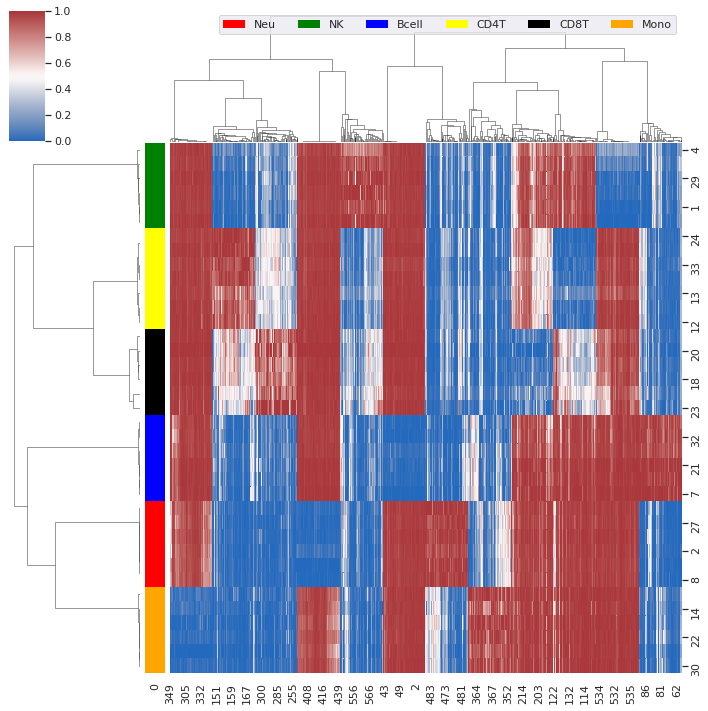

In [ ]:
plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=6)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

## clustering (dendrogram, heatmap) - EPIC reference data, preselectGlmnet probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/EPICdat_probes_preselectGlmnet.csv")

dat = dat.iloc[:,1:]
y = dat.iloc[0,:]
X = dat.iloc[1:,:]
X = X.T

X.index = range(37)
y.index = range(37)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange"]))
row_colors = y.map(my_palette)


<Figure size 720x576 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

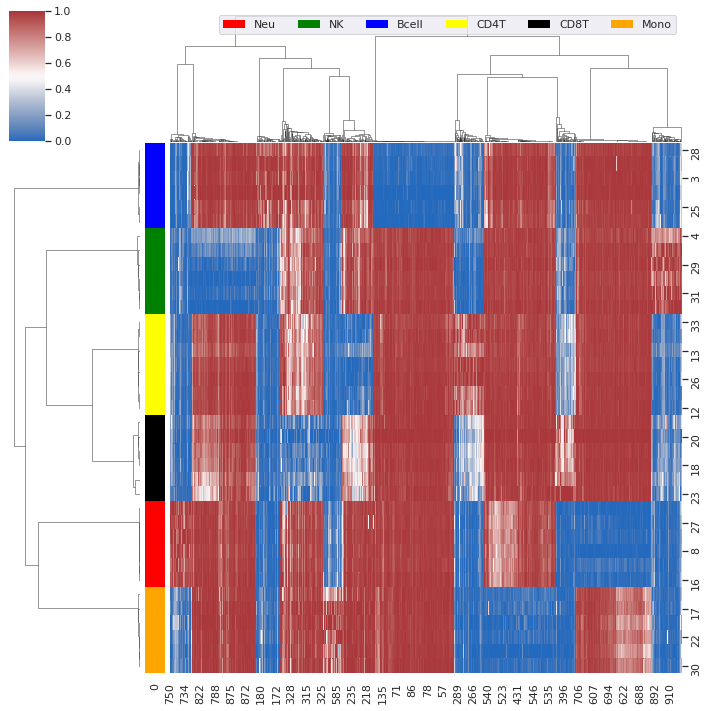

In [ ]:
plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=6)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

## clustering (dendrogram, heatmap) - EPIC-Epithelial reference data, oneVsAllttest probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dat1.csv")


<Figure size 720x576 with 0 Axes>

In [ ]:

dat = dat.iloc[:,1:]
y = dat.iloc[0,:]
X = dat.iloc[1:,:]
X = X.T

X.index = range(47)
y.index = range(47)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey"]))
row_colors = y.map(my_palette)


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

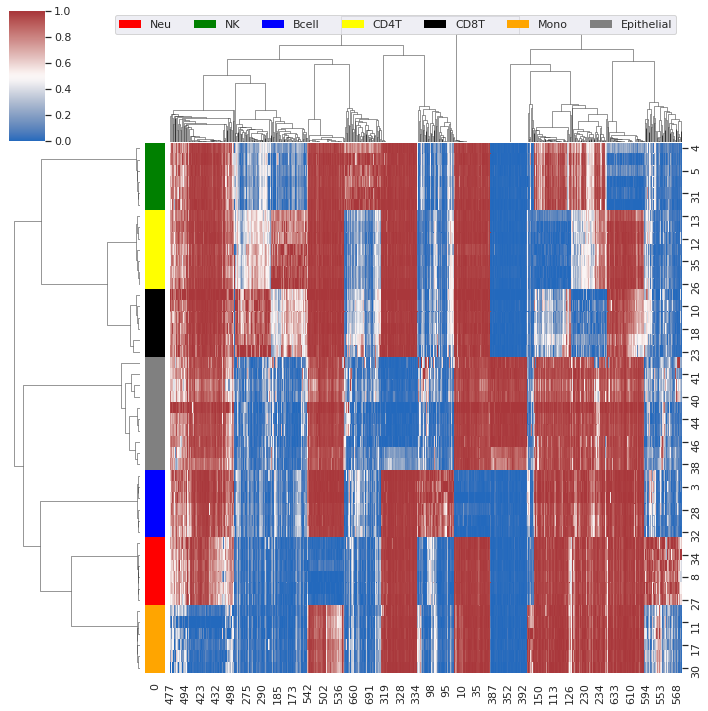

In [ ]:
plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=7)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

## clustering (dendrogram, heatmap) - EPIC-Epithelial reference data, preselectGlmnet probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dat2.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:]
X = dat.iloc[1:,:]
X = X.T

X.index = range(47)
y.index = range(47)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey"]))
row_colors = y.map(my_palette)


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

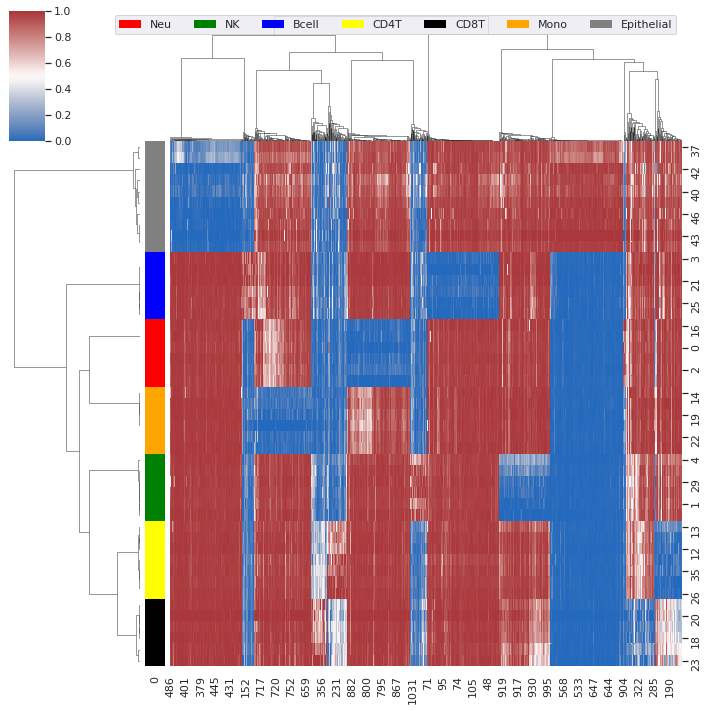

In [ ]:
plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=7)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

## clustering (dendrogram) - EPIC reference data, top 5000 variable probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/EPICdat_probes_HighVar_5000.csv")

<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]

y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

X.index = range(37)

X = X.astype(float)


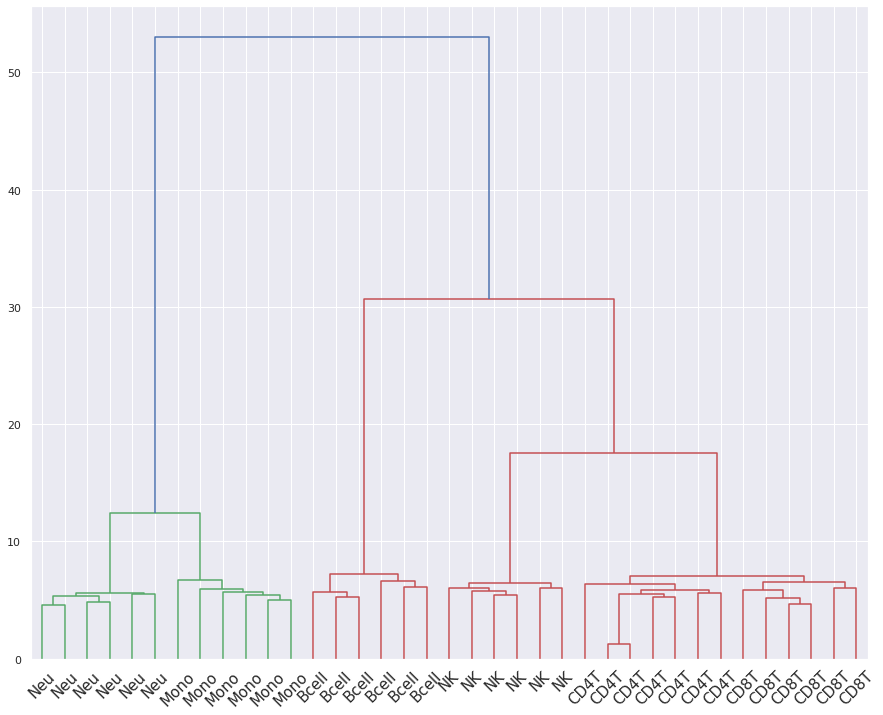

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = y

plt.figure(figsize=(15,12))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


# my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","purple","grey"]))
# row_colors = y.map(my_palette)


# # Create a color palette with 3 color for the 3 cyl possibilities
# my_palette = plt.cm.get_cmap("Accent_r", 8)
 
# # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.

# my_color=pd.Categorical(y).codes
 
# # Apply the right color to each label
# ax = plt.gca()
# xlbls = ax.get_xmajorticklabels()
# num=-1
# for lbl in xlbls:
#   num+=1
#   val=my_color[num]
#   lbl.set_color(my_palette(val))

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize= 15)
plt.show()

## clustering (dendrogram) - EPIC-Epithelial reference data, top 5000 variable probes

In [ ]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dat = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dat3.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x576 with 0 Axes>

In [ ]:
dat = dat.iloc[:,1:]

y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

X.index = range(47)

X = X.astype(float)


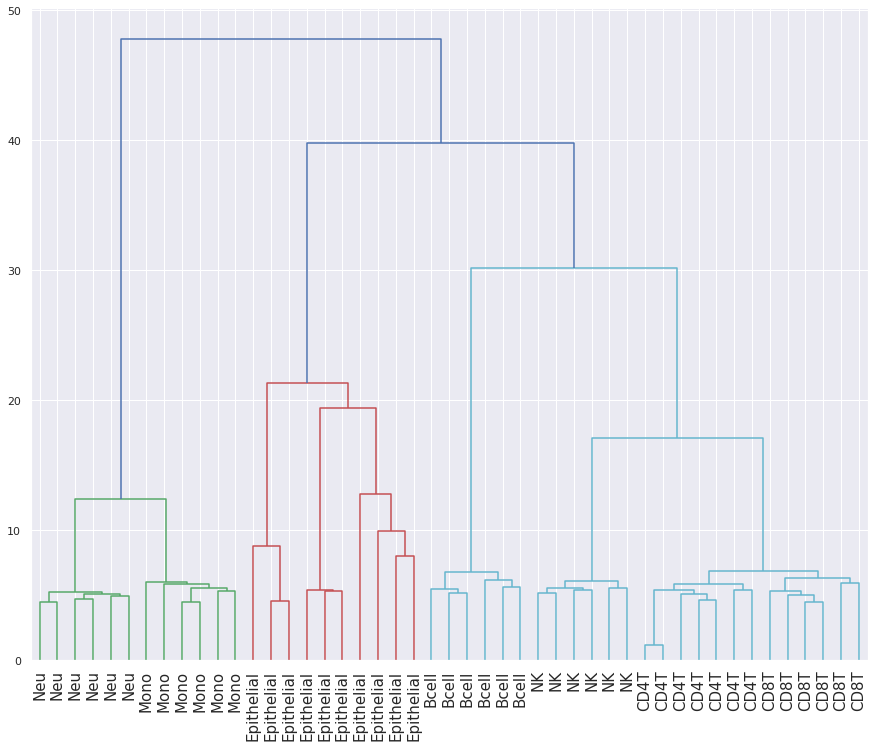

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = y

plt.figure(figsize=(15,12))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


# my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","purple","grey"]))
# row_colors = y.map(my_palette)


# # Create a color palette with 3 color for the 3 cyl possibilities
# my_palette = plt.cm.get_cmap("Accent_r", 8)
 
# # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.

# my_color=pd.Categorical(y).codes
 
# # Apply the right color to each label
# ax = plt.gca()
# xlbls = ax.get_xmajorticklabels()
# num=-1
# for lbl in xlbls:
#   num+=1
#   val=my_color[num]
#   lbl.set_color(my_palette(val))

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize= 15)
plt.show()